## ベクトルデータの可視化

### ライブラリのインポート

In [1]:
from json import load, dump
from matplotlib import pyplot as plt
import matplotlib as mpl
from umap import UMAP
import numpy as np
import wizmap

# 日本語フォントの設定
mpl.rcParams['font.family'] = 'MS Gothic' 

# 乱数のシードを設定
SEED = 2024117

# 画像の解像度を設定
plt.rcParams['figure.dpi'] = 300

### ファイルの読み込み

In [2]:
# JSONファイルからデータを読み込む
with open('総務省FAQ埋め込み.json', encoding='utf-8') as f:
    data = load(f)
    
# textsとembeddingsを抽出
text = data['texts']  # テキストデータの配列を取得
embedding = np.array(data['embeddings'])  # 埋め込みデータを numpy 配列に変換

print(f'読み込んだテキスト数: {len(text)}')
print(f'埋め込みの形状: {embedding.shape}')

読み込んだテキスト数: 1493
埋め込みの形状: (1493, 1024)


### 次元削減（UMAP）

d:\lab\wizmap-mic-faq\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


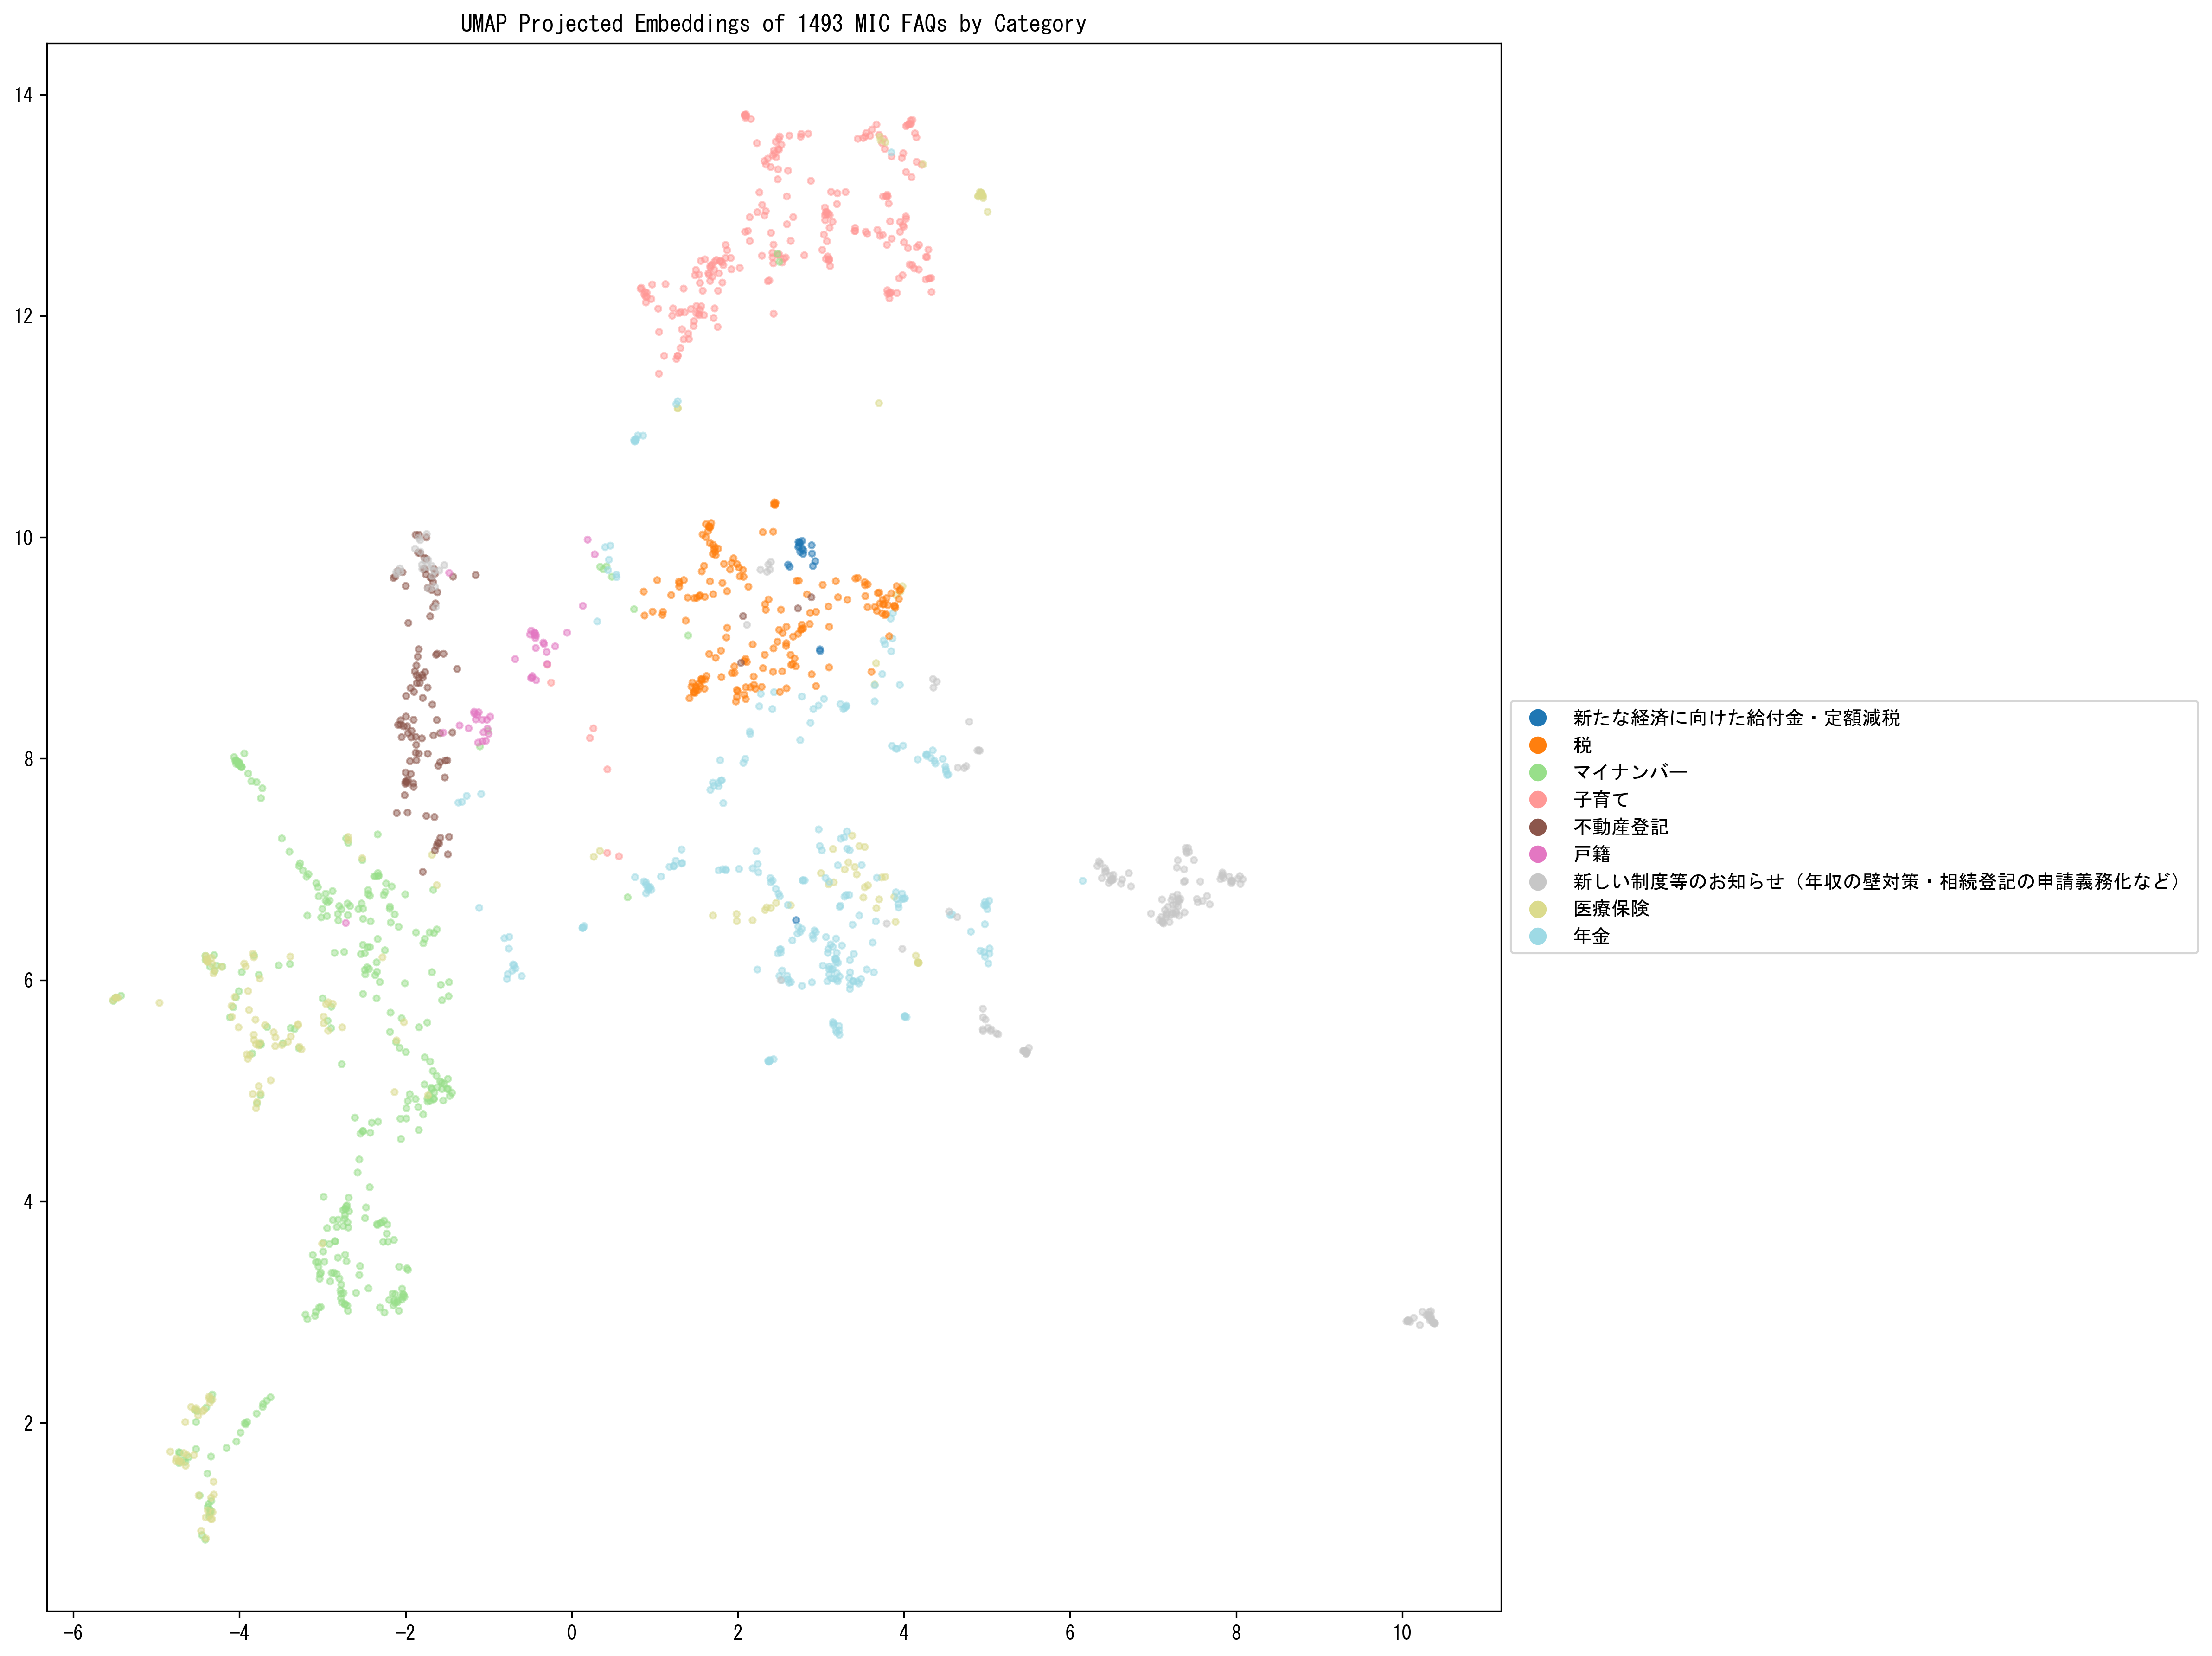

In [3]:
# UMAPのパラメータを設定
reducer = UMAP(metric='cosine', n_neighbors=15, min_dist=0.1, random_state=SEED, transform_seed=SEED, init='spectral')
# 次元削減
embeddings_2d = reducer.fit_transform(embedding)

# 大分類ファイルを読み込む
with open('大分類.txt', 'r', encoding='utf-8') as f:
    categories = [line.strip() for line in f.readlines()]

# ユニークな大分類を取得し、色をマッピング
unique_categories = list(set(categories))
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_categories)))
color_map = dict(zip(unique_categories, colors))

# 各データポイントの色を設定
point_colors = [color_map[cat] for cat in categories]

# プロット
plt.figure(figsize=(16, 12))
plt.title(f'UMAP Projected Embeddings of {len(text)} MIC FAQs by Category')
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], 
                     s=10.0, alpha=0.5, c=point_colors)

# 凡例を追加
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                            markerfacecolor=color_map[cat], 
                            label=cat, markersize=10)
                  for cat in unique_categories]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

### WizMap用データの生成

In [4]:
# データの座標を取得
xs = embeddings_2d[:, 0].astype(float).tolist()
ys = embeddings_2d[:, 1].astype(float).tolist()
texts = text

# データのリストを生成
data_list = wizmap.generate_data_list(xs, ys, texts)
# グリッドの辞書を生成
grid_dict = wizmap.generate_grid_dict(xs, ys, texts, '総務省FAQ', random_seed=SEED)

# JSONファイル（data.ndjsonとgrid.json）を保存
with open('data.ndjson', 'w', encoding='utf-8') as f:
    for item in data_list:
        dump(item, f, ensure_ascii=False)
        f.write('\n')

with open('grid.json', 'w', encoding='utf-8') as f:
    dump(grid_dict, f, ensure_ascii=False, indent=2)

Start generating data list...
Start generating contours...
Start generating multi-level summaries...


1493it [00:00, 213344.78it/s]
100%|██████████| 6/6 [00:00<00:00, 13.51it/s]


### WizMap を表示


In [7]:
# WizMap のdata.ndjsonのURLとgrid.jsonのURLを設定
data_url = 'http://localhost:3000/example/data.ndjson'
grid_url = 'http://localhost:3000/example/grid.json'

# wizmap を表示
wizmap.visualize(data_url, grid_url, height=700)

<iframe
 srcdoc="<!DOCTYPE html><html lang="en"><head><meta charset="UTF-8" /><meta name="viewport" content="width=device-width, initial-scale=1.0" /><title>WizMap</title><style>html {font-size: 16px;-moz-osx-font-smoothing: grayscale;-webkit-font-smoothing: antialiased;text-rendering: optimizeLegibility;-webkit-text-size-adjust: 100%;-moz-text-size-adjust: 100%;scroll-behavior: smooth;}html, body {position: relative;width: 100%;height: 100%;overscroll-behavior: none;}body {margin: 0px;padding: 0px;box-sizing: border-box;font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, Oxygen-Sans, Ubuntu, Cantarell, 'Helvetica Neue', sans-serif;color: hsl(0, 0%, 29%);font-size: 1em;font-weight: 400;line-height: 1.5;}*, ::after, ::before {box-sizing: inherit;}a {color: rgb(0, 100, 200);text-decoration: none;}a:hover {text-decoration: underline;}a:visited {color: rgb(0, 80, 160);}label {display: block;}input, select, textarea {font-family: inherit;font-size: inherit;-webkit-padding: 0 0;padding: 0;margin: 0 0 0 0;box-sizing: border-box;border: 1px solid #ccc;border-radius: 2px;}input:disabled {color: #ccc;}button {all: unset;outline: none;cursor: pointer;}</style><script defer src='data:text/javascript;base64,dmFyIHdpem1hcD1mdW5jdGlvbigpeyJ1c2Ugc3RyaWN0Ijt2YXIgSGY9T2JqZWN0LmRlZmluZVByb3BlcnR5O3ZhciBUZj0oZWwsUSxvbik9PlEgaW4gZWw/SGYoZWwsUSx7ZW51bWVyYWJsZTohMCxjb25maWd1cmFibGU6ITAsd3JpdGFibGU6ITAsdmFsdWU6b259KTplbFtRXT1vbjt2YXIgYnQ9KGVsLFEsb24pPT4oVGYoZWwsdHlwZW9mIFEhPSJzeW1ib2wiP1ErIiI6USxvbiksb24pO2Z1bmN0aW9uIGVsKCl7fWZ1bmN0aW9uIFEodCxpLGwsZSxuKXt0Ll9fc3ZlbHRlX21ldGE9e2xvYzp7ZmlsZTppLGxpbmU6bCxjb2x1bW46ZSxjaGFyOm59fX1mdW5jdGlvbiBvbih0KXtyZXR1cm4gdCgpfWZ1bmN0aW9uIHUwKCl7cmV0dXJuIE9iamVjdC5jcmVhdGUobnVsbCl9ZnVuY3Rpb24gb2UodCl7dC5mb3JFYWNoKG9uKX1mdW5jdGlvbiBjMCh0KXtyZXR1cm4gdHlwZW9mIHQ9PSJmdW5jdGlvbiJ9ZnVuY3Rpb24gdWQodCxpKXtyZXR1cm4gdCE9dD9pPT1pOnQhPT1pfHx0JiZ0eXBlb2YgdD09Im9iamVjdCJ8fHR5cGVvZiB0PT0iZnVuY3Rpb24ifWZ1bmN0aW9uIEhaKHQpe3JldHVybiBPYmplY3Qua2V5cyh0KS5sZW5ndGg9PT0wfWZ1bmN0aW9uIGEwKHQsaSl7dC5hcHBlbmRDaGlsZChpKX1mdW5jdGlvbiBobyh0LGksbCl7Y29uc3QgZT1UWih0KTtpZighZS5nZXRFbGVtZW50QnlJZChpKSl7Y29uc3Qgbj1FKCJzdHlsZSIpO24uaWQ9aSxuLnRleHRDb250ZW50PWwsa1ooZSxuKX19ZnVuY3Rpb24gVFoodCl7aWYoIXQpcmV0dXJuIGRvY3VtZW50O2NvbnN0IGk9dC5nZXRSb290Tm9kZT90LmdldFJvb3ROb2RlKCk6dC5vd25lckRvY3VtZW50O3JldHVybiBpJiZpLmhvc3Q/aTp0Lm93bmVyRG9jdW1lbnR9ZnVuY3Rpb24ga1oodCxpKXtyZXR1cm4gYTAodC5oZWFkfHx0LGkpLGkuc2hlZXR9ZnVuY3Rpb24gTVoodCxpLGwpe3QuaW5zZXJ0QmVmb3JlKGksbHx8bnVsbCl9ZnVuY3Rpb24gYjAodCl7dC5wYXJlbnROb2RlLnJlbW92ZUNoaWxkKHQpfWZ1bmN0aW9uIHdaKHQsaSl7Zm9yKGxldCBsPTA7bDx0Lmxlbmd0aDtsKz0xKXRbbF0mJnRbbF0uZChpKX1mdW5jdGlvbiBFKHQpe3JldHVybiBkb2N1bWVudC5jcmVhdGVFbGVtZW50KHQpfWZ1bmN0aW9uIG9jKHQpe3JldHVybiBkb2N1bWVudC5jcmVhdGVFbGVtZW50TlMoImh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIix0KX1mdW5jdGlvbiBkbCh0KXtyZXR1cm4gZG9jdW1lbnQuY3JlYXRlVGV4dE5vZGUodCl9ZnVuY3Rpb24gTnQoKXtyZXR1cm4gZGwoIiAiKX1mdW5jdGlvbiB2Wih0LGksbCxlKXtyZXR1cm4gdC5hZGRFdmVudExpc3RlbmVyKGksbCxlKSwoKT0+dC5yZW1vdmVFdmVudExpc3RlbmVyKGksbCxlKX1mdW5jdGlvbiBKWih0LGksbCl7bD09bnVsbD90LnJlbW92ZUF0dHJpYnV0ZShpKTp0LmdldEF0dHJpYnV0ZShpKSE9PWwmJnQuc2V0QXR0cmlidXRlKGksbCl9ZnVuY3Rpb24gTloodCl7cmV0dXJuIEFycmF5LmZyb20odC5jaGlsZE5vZGVzKX1mdW5jdGlvbiBjZCh0LGkpe3QudmFsdWU9aT09bnVsbD8iIjppfWZ1bmN0aW9uIHJpKHQsaSxsKXt0LmNsYXNzTGlzdFtsPyJhZGQiOiJyZW1vdmUiXShpKX1mdW5jdGlvbiB6Wih0LGkse2J1YmJsZXM6bD0hMSxjYW5jZWxhYmxlOmU9ITF9PXt9KXtjb25zdCBuPWRvY3VtZW50LmNyZWF0ZUV2ZW50KCJDdXN0b21FdmVudCIpO3JldHVybiBuLmluaXRDdXN0b21FdmVudCh0LGwsZSxpKSxufWxldCB0cztmdW5jdGlvbiBpcyh0KXt0cz10fWZ1bmN0aW9uIFBaKCl7aWYoIXRzKXRocm93IG5ldyBFcnJvcigiRnVuY3Rpb24gY2FsbGVkIG91dHNpZGUgY29tcG9uZW50IGluaXRpYWxpemF0aW9uIik7cmV0dXJuIHRzfWZ1bmN0aW9uIGFkKHQpe1BaKCkuJCQub25fbW91bnQucHVzaCh0KX1jb25zdCBscz1bXSx1bj1bXSxabz1bXSxtMD1bXSxGWj1Qcm9taXNlLnJlc29sdmUoKTtsZXQgdWM9ITE7ZnVuY3Rpb24galooKXt1Y3x8KHVjPSEwLEZaLnRoZW4ocjApKX1mdW5jdGlvbiBjYyh0KXtaby5wdXNoKHQpfWNvbnN0IGFjPW5ldyBTZXQ7bGV0IEdvPTA7ZnVuY3Rpb24gcjAoKXtjb25zdCB0PXRzO2Rve2Zvcig7R288bHMubGVuZ3RoOyl7Y29uc3QgaT1sc1tHb1